In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
import matplotlib.pyplot as plt 

In [4]:
from src.utils.io.read import RawDataReader

In [5]:
from src.settings import Settings

In [6]:
from src.utils.dates import get_nyse_business_dates

In [7]:
synthetic_spread_db = pd.read_csv(Settings.backfill.paths.PREPROCESSED_DATA_PATH / 'synthetic_spread_db.csv')

In [8]:
synthetic_spread_db.tail(2)

,Unnamed: 0,tradeDate,Name,F1_Price,F2_Price,F3_Price,F1_RolledPrice,F2_RolledPrice,F3_RolledPrice,month,...,forward_12D_F1MinusF2_RolledPrice_change,forward_13D_F1MinusF2_RolledPrice_change,forward_14D_F1MinusF2_RolledPrice_change,forward_15D_F1MinusF2_RolledPrice_change,forward_16D_F1MinusF2_RolledPrice_change,forward_17D_F1MinusF2_RolledPrice_change,forward_18D_F1MinusF2_RolledPrice_change,forward_19D_F1MinusF2_RolledPrice_change,beta_ols_10,beta_ols_20
3914,3926,2025-07-28,CL,66.71,65.91,65.29,66.71,65.91,65.29,2025-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.144116,1.033095
3915,3927,2025-07-29,CL,69.21,68.28,67.53,69.21,68.28,67.53,2025-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.028527,1.043900


In [9]:
synthetic_spread_db.columns.tolist()

['Unnamed: 0',
 'tradeDate',
 'Name',
 'F1_Price',
 'F2_Price',
 'F3_Price',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'month',
 'F1MinusF2_RolledPrice',
 'prior_1D_F1_RolledPrice_change',
 'prior_2D_F1_RolledPrice_change',
 'prior_3D_F1_RolledPrice_change',
 'prior_4D_F1_RolledPrice_change',
 'prior_5D_F1_RolledPrice_change',
 'prior_6D_F1_RolledPrice_change',
 'prior_7D_F1_RolledPrice_change',
 'prior_8D_F1_RolledPrice_change',
 'prior_9D_F1_RolledPrice_change',
 'prior_10D_F1_RolledPrice_change',
 'prior_11D_F1_RolledPrice_change',
 'prior_12D_F1_RolledPrice_change',
 'prior_13D_F1_RolledPrice_change',
 'prior_14D_F1_RolledPrice_change',
 'prior_15D_F1_RolledPrice_change',
 'prior_16D_F1_RolledPrice_change',
 'prior_17D_F1_RolledPrice_change',
 'prior_18D_F1_RolledPrice_change',
 'prior_19D_F1_RolledPrice_change',
 'F1_RolledPrice_rolling_20D_volatility',
 'prior_1D_F2_RolledPrice_change',
 'prior_2D_F2_RolledPrice_change',
 'prior_3D_F2_RolledPrice_change',
 'prior_

In [10]:
synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'] = synthetic_spread_db['F1_RolledPrice'] -  synthetic_spread_db['beta_ols_10']* synthetic_spread_db['F2_RolledPrice'] 
synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_20'] = synthetic_spread_db['F1_RolledPrice'] -  synthetic_spread_db['beta_ols_20']* synthetic_spread_db['F2_RolledPrice'] 

In [11]:
synthetic_spread_db.sort_values(by='tradeDate', ascending = True, inplace = True)

In [12]:
synthetic_spread_db['tradeDate'] = pd.to_datetime(synthetic_spread_db['tradeDate']).dt.date

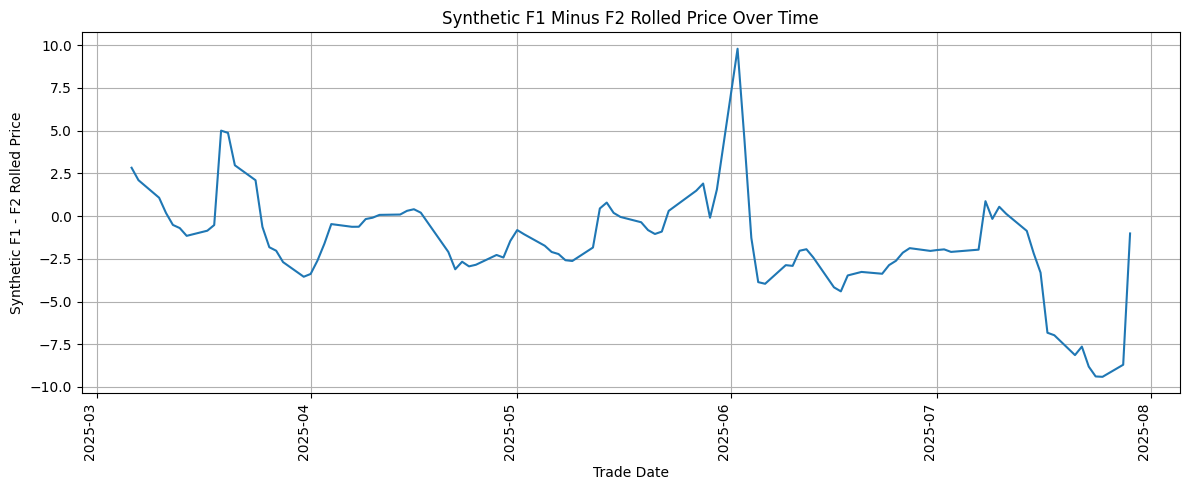

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the figure
plt.figure(figsize=(12, 5))

# Plot the data
plt.plot(
    synthetic_spread_db.tail(100)['tradeDate'],
    synthetic_spread_db.tail(100)['SyntheticF1MinusF2_RolledPrice_10'],
    '-'
)


# Labels and title
plt.xlabel('Trade Date')
plt.ylabel('Synthetic F1 - F2 Rolled Price')
plt.title('Synthetic F1 Minus F2 Rolled Price Over Time')
plt.xticks(rotation=90, ha='right')  # Rotate and align
plt.grid(True)

# Prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()


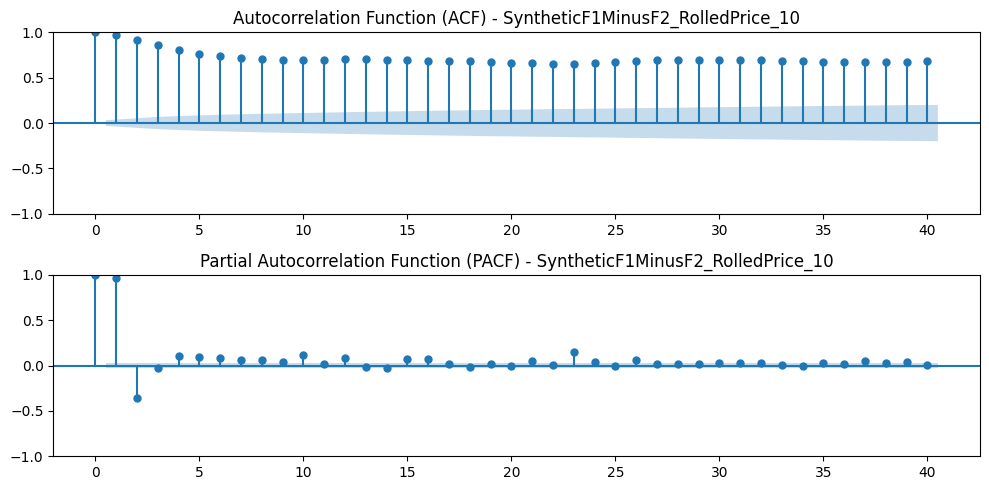

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot ACF
plot_acf(synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'].dropna(), 
         lags=40, 
         ax=axes[0], 
         title='Autocorrelation Function (ACF) - SyntheticF1MinusF2_RolledPrice_10')

# Plot PACF
plot_pacf(synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'].dropna(), 
          lags=40, 
          ax=axes[1], 
          title='Partial Autocorrelation Function (PACF) - SyntheticF1MinusF2_RolledPrice_10')

plt.tight_layout()
plt.show()

In [15]:
for w in [1,5]:
    synthetic_spread_db[f'prior_{w}D_SyntheticF1MinusF2_RolledPrice_10_change'] = (synthetic_spread_db[f'SyntheticF1MinusF2_RolledPrice_10'] -
    synthetic_spread_db[f'SyntheticF1MinusF2_RolledPrice_10'].shift(1) )

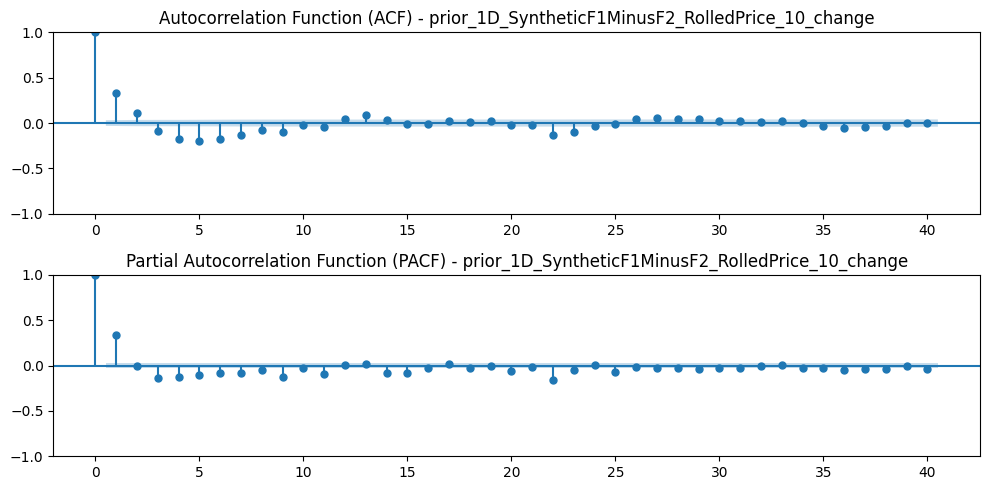

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot ACF
plot_acf(synthetic_spread_db['prior_1D_SyntheticF1MinusF2_RolledPrice_10_change'].dropna(), 
         lags=40, 
         ax=axes[0], 
         title='Autocorrelation Function (ACF) - prior_1D_SyntheticF1MinusF2_RolledPrice_10_change')

# Plot PACF
plot_pacf(synthetic_spread_db['prior_1D_SyntheticF1MinusF2_RolledPrice_10_change'].dropna(), 
          lags=40, 
          ax=axes[1], 
          title='Partial Autocorrelation Function (PACF) - prior_1D_SyntheticF1MinusF2_RolledPrice_10_change')

plt.tight_layout()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def test_stationarity_adf(timeseries, alpha=0.05, print_results=True):
    """
    Test whether a time series is stationary using the Augmented Dickey-Fuller test.
    
    Parameters:
    -----------
    timeseries : array-like
        The time series data to test
    alpha : float, default=0.05
        Significance level for the test
    print_results : bool, default=True
        Whether to print detailed results
    
    Returns:
    --------
    dict : Dictionary containing test results
        - 'is_stationary': bool, True if series is stationary
        - 'adf_statistic': float, ADF test statistic
        - 'p_value': float, p-value of the test
        - 'critical_values': dict, critical values at different significance levels
        - 'n_lags': int, number of lags used in the test
    """
    
    # Remove NaN values
    clean_series = pd.Series(timeseries).dropna()
    
    # Perform ADF test
    adf_result = adfuller(clean_series, autolag='AIC')
    
    # Extract results
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    n_lags = adf_result[2]
    critical_values = adf_result[4]
    
    # Determine if series is stationary
    is_stationary = p_value < alpha
    
    if print_results:
        print("Augmented Dickey-Fuller Test Results:")
        print("=" * 40)
        print(f"ADF Statistic: {adf_statistic:.6f}")
        print(f"p-value: {p_value:.6f}")
        print(f"Number of lags used: {n_lags}")
        print(f"Number of observations: {len(clean_series)}")
        print("\nCritical Values:")
        for key, value in critical_values.items():
            print(f"\t{key}: {value:.3f}")
        
        print(f"\nResult at {alpha*100}% significance level:")
        if is_stationary:
            print("✓ The time series is STATIONARY")
            print("  (We reject the null hypothesis of non-stationarity)")
        else:
            print("✗ The time series is NON-STATIONARY") 
            print("  (We fail to reject the null hypothesis of non-stationarity)")
    
    return {
        'is_stationary': is_stationary,
        'adf_statistic': adf_statistic,
        'p_value': p_value,
        'critical_values': critical_values,
        'n_lags': n_lags,
        'n_observations': len(clean_series)
    }

In [19]:
# Test stationarity of the synthetic spread (levels)
print("Testing stationarity of SyntheticF1MinusF2_RolledPrice_10 (levels):")
adf_results_levels = test_stationarity_adf(synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'])

Testing stationarity of SyntheticF1MinusF2_RolledPrice_10 (levels):
Augmented Dickey-Fuller Test Results:
ADF Statistic: -2.705518
p-value: 0.073088
Number of lags used: 30
Number of observations: 3906

Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

Result at 5.0% significance level:
✗ The time series is NON-STATIONARY
  (We fail to reject the null hypothesis of non-stationarity)


In [20]:
print("\n" + "="*60)
print("Testing stationarity of SyntheticF1MinusF2_RolledPrice_10 (first differences):")
adf_results_diff = test_stationarity_adf(synthetic_spread_db['prior_1D_SyntheticF1MinusF2_RolledPrice_10_change'])


Testing stationarity of SyntheticF1MinusF2_RolledPrice_10 (first differences):
Augmented Dickey-Fuller Test Results:
ADF Statistic: -18.351254
p-value: 0.000000
Number of lags used: 30
Number of observations: 3905

Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

Result at 5.0% significance level:
✓ The time series is STATIONARY
  (We reject the null hypothesis of non-stationarity)


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [22]:
def walk_forward_arma(timeseries, train_size=100, p=1, q=2, verbose=True):
    """
    Perform walk-forward validation with ARMA(p,q) model for 1-step ahead predictions.
    
    Parameters:
    -----------
    timeseries : array-like
        The time series data to model
    train_size : int, default=100
        Minimum number of observations for initial training
    p : int, default=1
        Order of autoregressive component
    q : int, default=2
        Order of moving average component
    verbose : bool, default=True
        Whether to print progress updates
        
    Returns:
    --------
    dict : Dictionary containing:
        - 'y_true': actual values
        - 'y_pred': predicted values
        - 'dates': corresponding dates/indices
        - 'mse': mean squared error
        - 'mae': mean absolute error
        - 'rmse': root mean squared error
    """
    
    # Clean the series and convert to pandas Series if needed
    if isinstance(timeseries, pd.Series):
        clean_series = timeseries.dropna()
    else:
        clean_series = pd.Series(timeseries).dropna()
    
    # Check if we have enough data
    if len(clean_series) < train_size + 10:
        raise ValueError(f"Not enough data. Need at least {train_size + 10} observations, got {len(clean_series)}")
    
    # Initialize storage for predictions and actuals
    y_true = []
    y_pred = []
    prediction_indices = []
    
    # Walk-forward validation
    for i in range(train_size, len(clean_series)):
        try:
            # Get training data (expanding window)
            train_data = clean_series.iloc[:i]
            
            # Fit ARMA model
            model = ARIMA(train_data, order=(p, 0, q))  # (p,d,q) where d=0 for ARMA
            fitted_model = model.fit()
            
            # Make 1-step ahead forecast
            forecast = fitted_model.forecast(steps=1)
            
            # Store results
            y_true.append(clean_series.iloc[i])
            y_pred.append(forecast.iloc[0] if hasattr(forecast, 'iloc') else forecast[0])
            prediction_indices.append(clean_series.index[i])
            
            # Print progress
            if verbose and (i - train_size + 1) % 50 == 0:
                print(f"Completed {i - train_size + 1}/{len(clean_series) - train_size} predictions")
                
        except Exception as e:
            if verbose:
                print(f"Warning: Failed to fit model at step {i}: {e}")
            continue
    
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    if verbose:
        print(f"\nWalk-Forward ARMA({p},{q}) Results:")
        print(f"Total predictions: {len(y_true)}")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"RMSE: {rmse:.6f}")
    
    return {
        'y_true': y_true,
        'y_pred': y_pred,
        'dates': prediction_indices,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'n_predictions': len(y_true)
    }

In [23]:
# Apply ARMA(1,2) walk-forward validation to the synthetic spread
print("Fitting ARMA(1,2) model with walk-forward validation...")
print("=" * 60)

# Use the synthetic spread data
target_series = synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'].dropna()

# Run walk-forward validation
arma_results = walk_forward_arma(
    timeseries=target_series, 
    train_size=100,  # Start with 100 observations
    p=1, 
    q=2, 
    verbose=True
)

Fitting ARMA(1,2) model with walk-forward validation...
Completed 50/3806 predictions
Completed 100/3806 predictions
Completed 150/3806 predictions
Completed 200/3806 predictions
Completed 250/3806 predictions
Completed 300/3806 predictions
Completed 350/3806 predictions
Completed 400/3806 predictions
Completed 450/3806 predictions
Completed 500/3806 predictions
Completed 550/3806 predictions
Completed 600/3806 predictions
Completed 650/3806 predictions
Completed 700/3806 predictions
Completed 750/3806 predictions
Completed 800/3806 predictions
Completed 850/3806 predictions
Completed 900/3806 predictions
Completed 950/3806 predictions
Completed 1000/3806 predictions
Completed 1050/3806 predictions
Completed 1100/3806 predictions
Completed 1150/3806 predictions
Completed 1200/3806 predictions
Completed 1250/3806 predictions
Completed 1300/3806 predictions
Completed 1350/3806 predictions
Completed 1400/3806 predictions
Completed 1450/3806 predictions
Completed 1500/3806 predictions
Comp

In [24]:
# Extract y_true and y_pred
y_true = arma_results['y_true']
y_pred = arma_results['y_pred']
dates = arma_results['dates']

print(f"\nResults Summary:")
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred: {len(y_pred)}")
print(f"First 5 actual values: {y_true[:5]}")
print(f"First 5 predicted values: {y_pred[:5]}")


Results Summary:
Length of y_true: 3806
Length of y_pred: 3806
First 5 actual values: [14.39688067 16.63888223 16.02542948 13.30433024 13.16852033]
First 5 predicted values: [17.21649762 13.5811454  17.74811459 15.68893405 12.80340803]


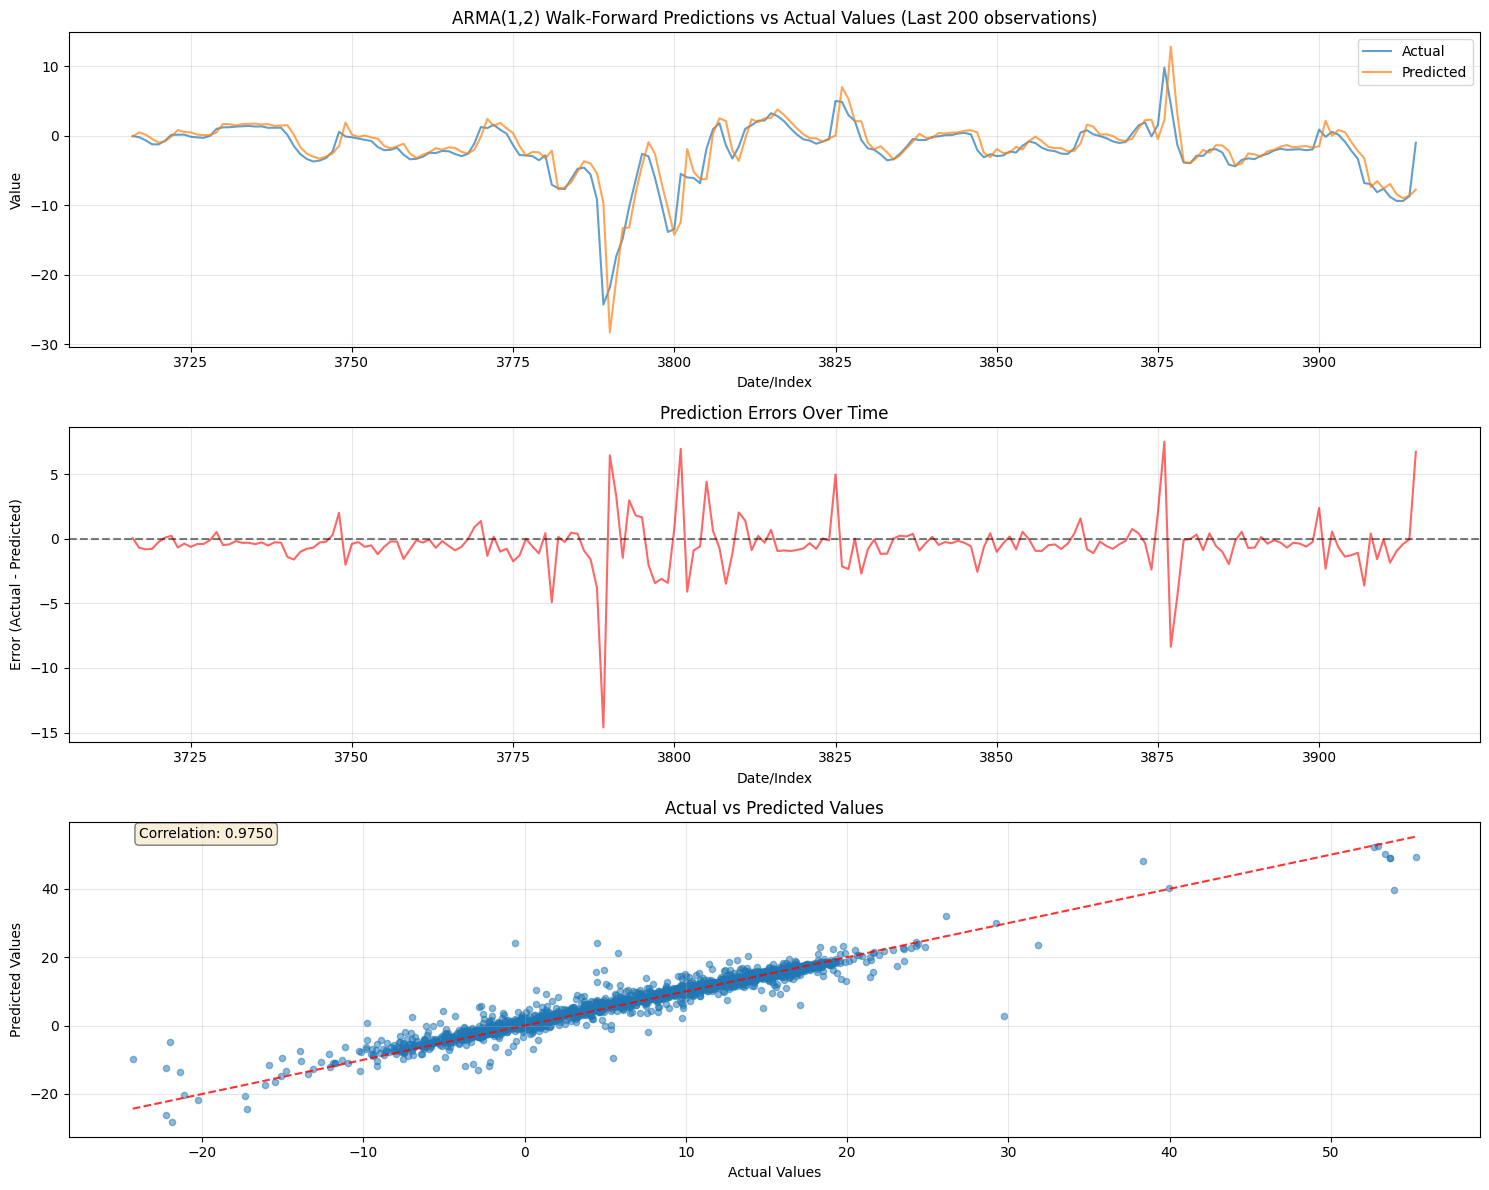


Model Performance Metrics:
Correlation between actual and predicted: 0.9750
Mean prediction error: -0.332528
Std of prediction errors: 1.628593


In [25]:
# Visualize the results
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Plot 1: Time series of actual vs predicted (last 200 points for clarity)
n_plot = min(200, len(y_true))
plot_dates = dates[-n_plot:] if len(dates) == len(y_true) else range(len(y_true))[-n_plot:]

axes[0].plot(plot_dates, y_true[-n_plot:], label='Actual', alpha=0.7, linewidth=1.5)
axes[0].plot(plot_dates, y_pred[-n_plot:], label='Predicted', alpha=0.7, linewidth=1.5)
axes[0].set_title('ARMA(1,2) Walk-Forward Predictions vs Actual Values (Last 200 observations)')
axes[0].set_xlabel('Date/Index')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Prediction errors over time
prediction_errors = y_true - y_pred
axes[1].plot(plot_dates, prediction_errors[-n_plot:], color='red', alpha=0.6)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('Prediction Errors Over Time')
axes[1].set_xlabel('Date/Index')
axes[1].set_ylabel('Error (Actual - Predicted)')
axes[1].grid(True, alpha=0.3)

# Plot 3: Scatter plot of actual vs predicted
axes[2].scatter(y_true, y_pred, alpha=0.5, s=20)
axes[2].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', alpha=0.8)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Actual vs Predicted Values')
axes[2].grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef(y_true, y_pred)[0, 1]
axes[2].text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nModel Performance Metrics:")
print(f"Correlation between actual and predicted: {correlation:.4f}")
print(f"Mean prediction error: {np.mean(prediction_errors):.6f}")
print(f"Std of prediction errors: {np.std(prediction_errors):.6f}")

In [26]:
# Create a DataFrame with the results for easy access and analysis
results_df = pd.DataFrame({
    'date': dates,
    'y_true': y_true,
    'y_pred': y_pred,
    'prediction_error': y_true - y_pred,
    'absolute_error': np.abs(y_true - y_pred),
    'squared_error': (y_true - y_pred) ** 2
})

print("Results DataFrame:")
print(results_df.head(10))
print(f"\nDataFrame shape: {results_df.shape}")

# Save results for later use
print(f"\nAvailable variables:")
print(f"- y_true: numpy array of actual values (length: {len(y_true)})")
print(f"- y_pred: numpy array of predicted values (length: {len(y_pred)})")
print(f"- results_df: pandas DataFrame with all results")
print(f"- arma_results: dictionary with full results and metrics")

Results DataFrame:
   date     y_true     y_pred  prediction_error  absolute_error  squared_error
0   110  14.396881  17.216498         -2.819617        2.819617       7.950240
1   111  16.638882  13.581145          3.057737        3.057737       9.349755
2   112  16.025429  17.748115         -1.722685        1.722685       2.967644
3   113  13.304330  15.688934         -2.384604        2.384604       5.686335
4   114  13.168520  12.803408          0.365112        0.365112       0.133307
5   115  13.667741  13.897636         -0.229895        0.229895       0.052852
6   116  13.641278  14.248104         -0.606825        0.606825       0.368237
7   117  13.977383  13.988008         -0.010624        0.010624       0.000113
8   118   9.990949  14.482935         -4.491986        4.491986      20.177938
9   119  10.391316   9.372298          1.019018        1.019018       1.038397

DataFrame shape: (3806, 6)

Available variables:
- y_true: numpy array of actual values (length: 3806)
- y_pred

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [29]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout)
        
        # Output layer
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Take the last output
        out = out[:, -1, :]
        
        # Apply dropout
        out = self.dropout(out)
        
        # Apply linear layer
        out = self.linear(out)
        
        return out

In [30]:
def create_sequences(data, sequence_length):
    """
    Create sequences for LSTM training.
    
    Parameters:
    -----------
    data : array-like
        The time series data
    sequence_length : int
        Length of input sequences
        
    Returns:
    --------
    X, y : numpy arrays
        Input sequences and corresponding targets
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

def train_lstm_model(X_train, y_train, sequence_length, epochs=50, batch_size=32, 
                     hidden_size=50, num_layers=1, learning_rate=0.001, verbose=False):
    """
    Train an LSTM model on the given data.
    
    Parameters:
    -----------
    X_train, y_train : numpy arrays
        Training sequences and targets
    sequence_length : int
        Length of input sequences
    epochs : int
        Number of training epochs
    batch_size : int
        Batch size for training
    hidden_size : int
        Hidden size of LSTM
    num_layers : int
        Number of LSTM layers
    learning_rate : float
        Learning rate for optimizer
    verbose : bool
        Whether to print training progress
        
    Returns:
    --------
    model : trained LSTM model
    scaler : fitted MinMaxScaler
    """
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1)  # Add feature dimension
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(-1)
    
    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    model = LSTMModel(input_size=1, hidden_size=hidden_size, num_layers=num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if verbose and (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.6f}')
    
    return model

In [31]:
def walk_forward_lstm(timeseries, train_size=100, sequence_length=10, epochs=50, 
                      batch_size=32, hidden_size=50, num_layers=1, learning_rate=0.001, verbose=True):
    """
    Perform walk-forward validation with LSTM model for 1-step ahead predictions.
    
    Parameters:
    -----------
    timeseries : array-like
        The time series data to model
    train_size : int, default=100
        Minimum number of observations for initial training
    sequence_length : int, default=10
        Length of input sequences for LSTM
    epochs : int, default=50
        Number of training epochs for each model
    batch_size : int, default=32
        Batch size for training
    hidden_size : int, default=50
        Hidden size of LSTM
    num_layers : int, default=1
        Number of LSTM layers
    learning_rate : float, default=0.001
        Learning rate for optimizer
    verbose : bool, default=True
        Whether to print progress updates
        
    Returns:
    --------
    dict : Dictionary containing:
        - 'y_true': actual values
        - 'y_pred': predicted values
        - 'dates': corresponding dates/indices
        - 'mse': mean squared error
        - 'mae': mean absolute error
        - 'rmse': root mean squared error
    """
    
    # Clean the series and convert to pandas Series if needed
    if isinstance(timeseries, pd.Series):
        clean_series = timeseries.dropna()
    else:
        clean_series = pd.Series(timeseries).dropna()
    
    # Check if we have enough data
    min_required = train_size + sequence_length + 10
    if len(clean_series) < min_required:
        raise ValueError(f"Not enough data. Need at least {min_required} observations, got {len(clean_series)}")
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(clean_series.values.reshape(-1, 1)).flatten()
    
    # Initialize storage for predictions and actuals
    y_true = []
    y_pred = []
    prediction_indices = []
    
    # Walk-forward validation
    start_idx = train_size + sequence_length
    total_predictions = len(scaled_data) - start_idx
    
    if verbose:
        print(f"Starting walk-forward validation with LSTM...")
        print(f"Total predictions to make: {total_predictions}")
    
    for i in range(start_idx, len(scaled_data)):
        try:
            # Get training data (expanding window)
            train_data = scaled_data[:i]
            
            # Create sequences for training
            if len(train_data) >= sequence_length + 1:
                X_train, y_train = create_sequences(train_data, sequence_length)
                
                # Train LSTM model
                model = train_lstm_model(
                    X_train, y_train, sequence_length, 
                    epochs=epochs, batch_size=batch_size,
                    hidden_size=hidden_size, num_layers=num_layers,
                    learning_rate=learning_rate, verbose=False
                )
                
                # Prepare input for prediction (last sequence_length points)
                last_sequence = train_data[-sequence_length:].reshape(1, sequence_length, 1)
                X_pred = torch.FloatTensor(last_sequence)
                
                # Make prediction
                model.eval()
                with torch.no_grad():
                    pred_scaled = model(X_pred).item()
                
                # Inverse transform the prediction
                pred_original = scaler.inverse_transform([[pred_scaled]])[0][0]
                actual_original = clean_series.iloc[i]
                
                # Store results
                y_true.append(actual_original)
                y_pred.append(pred_original)
                prediction_indices.append(clean_series.index[i])
                
                # Print progress
                current_pred = i - start_idx + 1
                if verbose and current_pred % 25 == 0:
                    print(f"Completed {current_pred}/{total_predictions} predictions")
                    
        except Exception as e:
            if verbose:
                print(f"Warning: Failed to fit LSTM model at step {i}: {e}")
            continue
    
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    if verbose:
        print(f"\nWalk-Forward LSTM Results:")
        print(f"Total predictions: {len(y_true)}")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"RMSE: {rmse:.6f}")
    
    return {
        'y_true': y_true,
        'y_pred': y_pred,
        'dates': prediction_indices,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'n_predictions': len(y_true),
        'sequence_length': sequence_length,
        'scaler': scaler
    }

In [32]:
# Apply LSTM walk-forward validation to the synthetic spread
print("Fitting LSTM model with walk-forward validation...")
print("=" * 60)

# Use the same synthetic spread data as ARMA
target_series = synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'].dropna()

# Run walk-forward validation with LSTM
# Note: Using smaller epochs for faster execution, you can increase for better performance
lstm_results = walk_forward_lstm(
    timeseries=target_series, 
    train_size=100,  # Same as ARMA
    sequence_length=10,  # Look back 10 time steps
    epochs=30,  # Reduced for faster execution
    batch_size=16,
    hidden_size=32,  # Smaller for faster training
    num_layers=1,
    learning_rate=0.001,
    verbose=True
)

Fitting LSTM model with walk-forward validation...
Starting walk-forward validation with LSTM...
Total predictions to make: 3796
Completed 25/3796 predictions
Completed 50/3796 predictions
Completed 75/3796 predictions
Completed 100/3796 predictions
Completed 125/3796 predictions
Completed 150/3796 predictions
Completed 175/3796 predictions
Completed 200/3796 predictions
Completed 225/3796 predictions
Completed 250/3796 predictions
Completed 275/3796 predictions
Completed 300/3796 predictions
Completed 325/3796 predictions
Completed 350/3796 predictions
Completed 375/3796 predictions
Completed 400/3796 predictions
Completed 425/3796 predictions
Completed 450/3796 predictions
Completed 475/3796 predictions
Completed 500/3796 predictions
Completed 525/3796 predictions
Completed 550/3796 predictions
Completed 575/3796 predictions
Completed 600/3796 predictions
Completed 625/3796 predictions
Completed 650/3796 predictions
Completed 675/3796 predictions
Completed 700/3796 predictions
Comple

In [33]:
# Extract LSTM results
y_true_lstm = lstm_results['y_true']
y_pred_lstm = lstm_results['y_pred']
dates_lstm = lstm_results['dates']

print(f"\nLSTM Results Summary:")
print(f"Length of y_true: {len(y_true_lstm)}")
print(f"Length of y_pred: {len(y_pred_lstm)}")
print(f"First 5 actual values: {y_true_lstm[:5]}")
print(f"First 5 predicted values: {y_pred_lstm[:5]}")

# Compare with ARMA results
print(f"\n" + "="*60)
print("MODEL COMPARISON:")
print(f"ARMA(1,2) - MSE: {arma_results['mse']:.6f}, MAE: {arma_results['mae']:.6f}, RMSE: {arma_results['rmse']:.6f}")
print(f"LSTM     - MSE: {lstm_results['mse']:.6f}, MAE: {lstm_results['mae']:.6f}, RMSE: {lstm_results['rmse']:.6f}")

# Calculate improvement
mse_improvement = ((arma_results['mse'] - lstm_results['mse']) / arma_results['mse']) * 100
print(f"MSE Improvement: {mse_improvement:.2f}% {'(LSTM better)' if mse_improvement > 0 else '(ARMA better)'}")


LSTM Results Summary:
Length of y_true: 3796
Length of y_pred: 3796
First 5 actual values: [13.02443774 18.52299742 21.40208889 21.61771073 21.96621323]
First 5 predicted values: [14.27485536 14.25279916 14.66795759 15.50250636 16.25004488]

MODEL COMPARISON:
ARMA(1,2) - MSE: 2.762890, MAE: 0.824995, RMSE: 1.662194
LSTM     - MSE: 6.003935, MAE: 1.333280, RMSE: 2.450293
MSE Improvement: -117.31% (ARMA better)


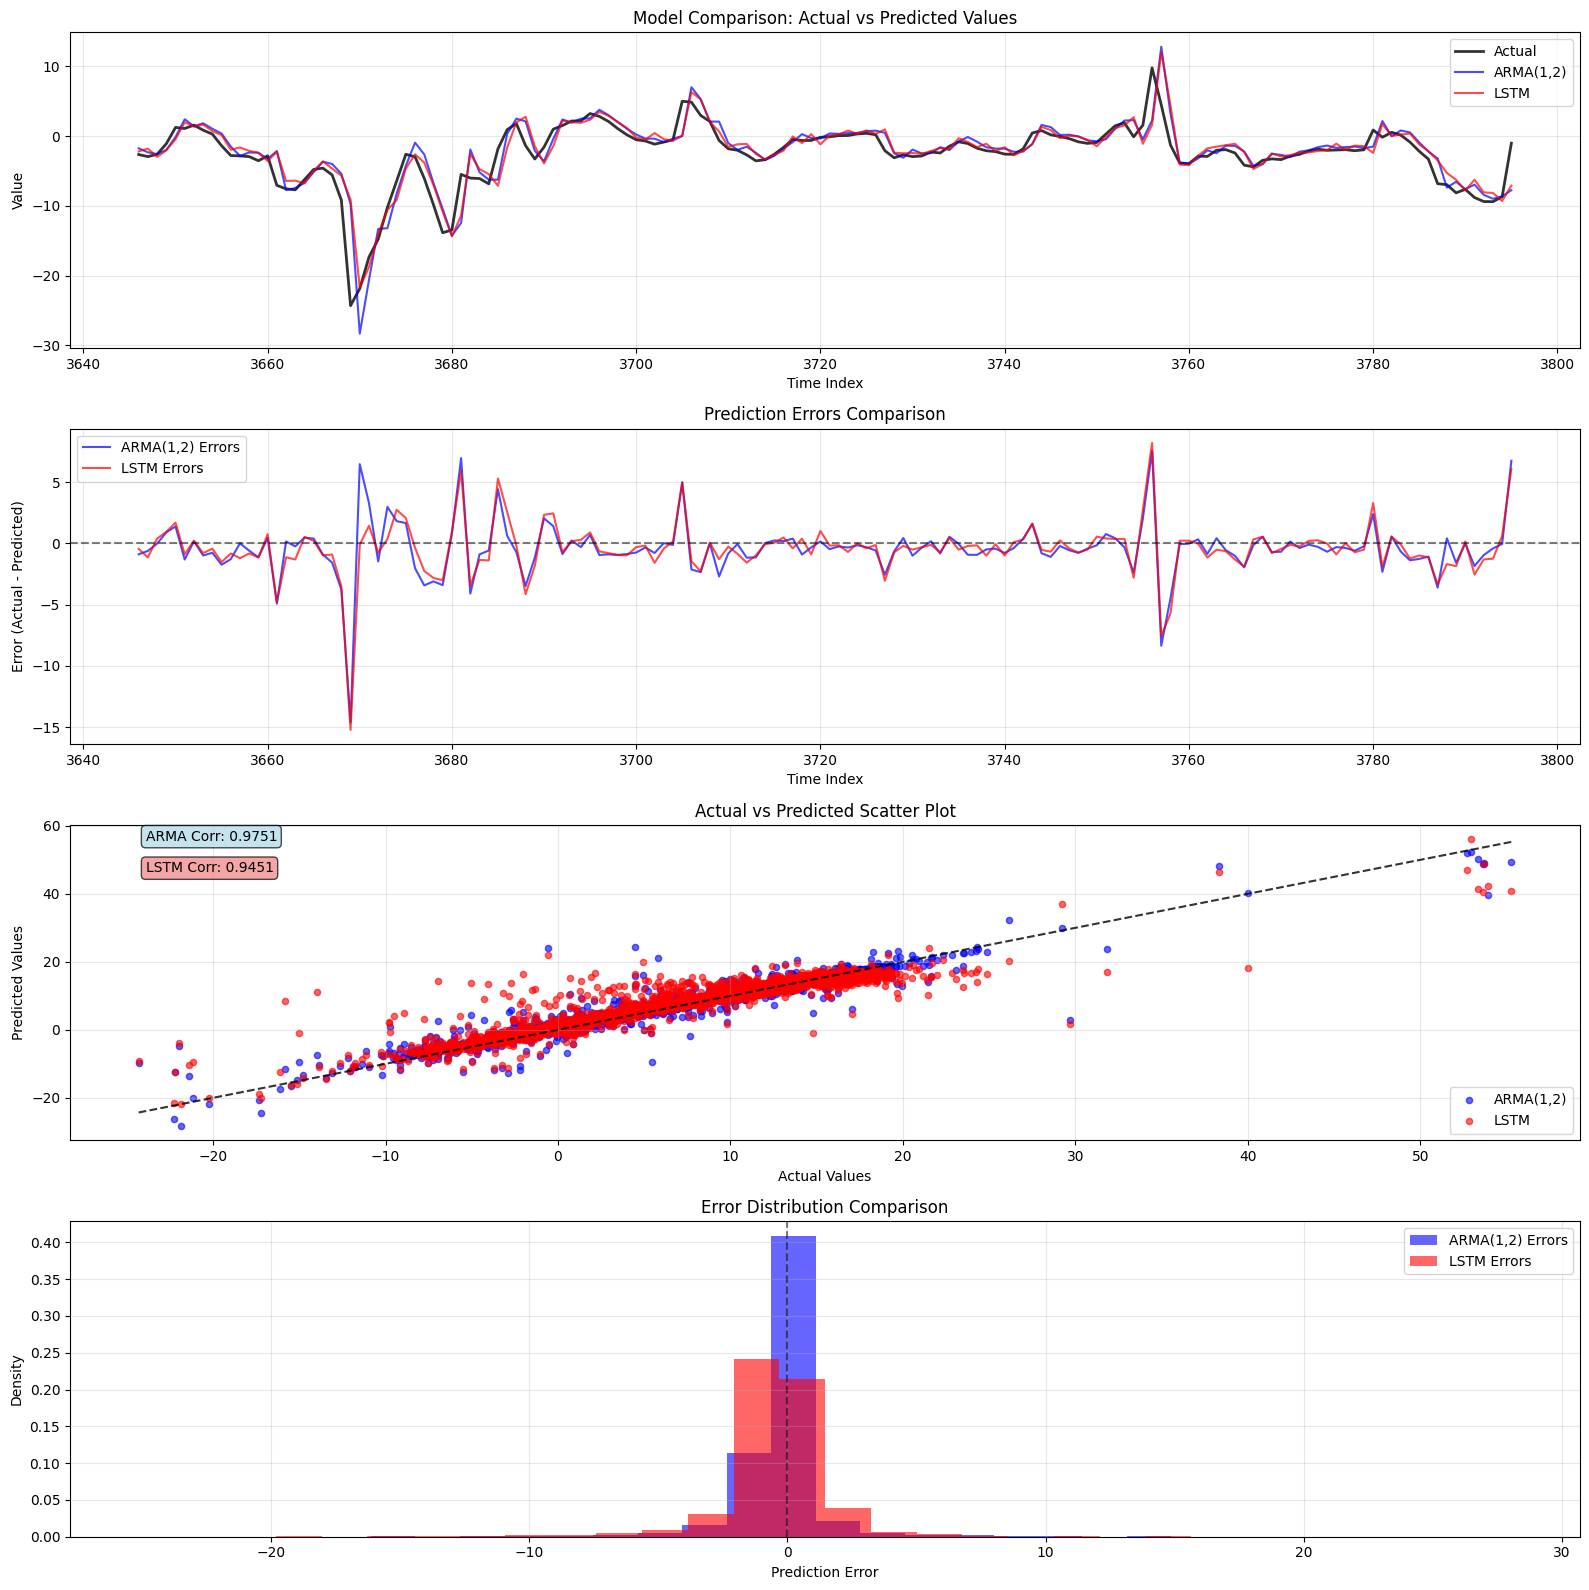


Detailed Model Comparison (on overlapping 3796 predictions):
Metric          ARMA(1,2)    LSTM         Better    
-------------------------------------------------------
MSE             2.757596     6.003935     ARMA
MAE             0.822767     1.333280     ARMA
Correlation     0.975072     0.945101     ARMA
Error Std       1.627209     2.409027     ARMA


In [34]:
# Create comprehensive comparison visualization
fig, axes = plt.subplots(4, 1, figsize=(16, 16))

# Align the datasets for comparison (take overlapping period)
min_len = min(len(y_true), len(y_true_lstm))
n_plot = min(150, min_len)  # Plot last 150 observations

# Get overlapping periods
arma_start_idx = len(y_true) - min_len
lstm_start_idx = len(y_true_lstm) - min_len

y_true_common = y_true[arma_start_idx:][:min_len]
y_pred_arma_common = y_pred[arma_start_idx:][:min_len]
y_true_lstm_common = y_true_lstm[lstm_start_idx:][:min_len]
y_pred_lstm_common = y_pred_lstm[lstm_start_idx:][:min_len]

plot_indices = range(min_len)[-n_plot:]

# Plot 1: Actual vs Predicted for both models
axes[0].plot(plot_indices, y_true_common[-n_plot:], label='Actual', alpha=0.8, linewidth=2, color='black')
axes[0].plot(plot_indices, y_pred_arma_common[-n_plot:], label='ARMA(1,2)', alpha=0.7, linewidth=1.5, color='blue')
axes[0].plot(plot_indices, y_pred_lstm_common[-n_plot:], label='LSTM', alpha=0.7, linewidth=1.5, color='red')
axes[0].set_title('Model Comparison: Actual vs Predicted Values')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Prediction errors comparison
arma_errors = y_true_common - y_pred_arma_common
lstm_errors = y_true_lstm_common - y_pred_lstm_common

axes[1].plot(plot_indices, arma_errors[-n_plot:], label='ARMA(1,2) Errors', alpha=0.7, color='blue')
axes[1].plot(plot_indices, lstm_errors[-n_plot:], label='LSTM Errors', alpha=0.7, color='red')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('Prediction Errors Comparison')
axes[1].set_xlabel('Time Index')
axes[1].set_ylabel('Error (Actual - Predicted)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Scatter plots side by side
# ARMA scatter
axes[2].scatter(y_true_common, y_pred_arma_common, alpha=0.6, s=20, color='blue', label='ARMA(1,2)')
axes[2].scatter(y_true_lstm_common, y_pred_lstm_common, alpha=0.6, s=20, color='red', label='LSTM')
axes[2].plot([y_true_common.min(), y_true_common.max()], 
             [y_true_common.min(), y_true_common.max()], 'k--', alpha=0.8)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Actual vs Predicted Scatter Plot')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Add correlation coefficients
corr_arma = np.corrcoef(y_true_common, y_pred_arma_common)[0, 1]
corr_lstm = np.corrcoef(y_true_lstm_common, y_pred_lstm_common)[0, 1]
axes[2].text(0.05, 0.95, f'ARMA Corr: {corr_arma:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.7))
axes[2].text(0.05, 0.85, f'LSTM Corr: {corr_lstm:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.7))

# Plot 4: Error distribution comparison
axes[3].hist(arma_errors, bins=30, alpha=0.6, color='blue', label='ARMA(1,2) Errors', density=True)
axes[3].hist(lstm_errors, bins=30, alpha=0.6, color='red', label='LSTM Errors', density=True)
axes[3].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[3].set_title('Error Distribution Comparison')
axes[3].set_xlabel('Prediction Error')
axes[3].set_ylabel('Density')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison statistics
print(f"\nDetailed Model Comparison (on overlapping {min_len} predictions):")
print(f"{'Metric':<15} {'ARMA(1,2)':<12} {'LSTM':<12} {'Better':<10}")
print("-" * 55)
print(f"{'MSE':<15} {mean_squared_error(y_true_common, y_pred_arma_common):<12.6f} {mean_squared_error(y_true_lstm_common, y_pred_lstm_common):<12.6f} {'LSTM' if mean_squared_error(y_true_lstm_common, y_pred_lstm_common) < mean_squared_error(y_true_common, y_pred_arma_common) else 'ARMA'}")
print(f"{'MAE':<15} {mean_absolute_error(y_true_common, y_pred_arma_common):<12.6f} {mean_absolute_error(y_true_lstm_common, y_pred_lstm_common):<12.6f} {'LSTM' if mean_absolute_error(y_true_lstm_common, y_pred_lstm_common) < mean_absolute_error(y_true_common, y_pred_arma_common) else 'ARMA'}")
print(f"{'Correlation':<15} {corr_arma:<12.6f} {corr_lstm:<12.6f} {'LSTM' if corr_lstm > corr_arma else 'ARMA'}")
print(f"{'Error Std':<15} {np.std(arma_errors):<12.6f} {np.std(lstm_errors):<12.6f} {'LSTM' if np.std(lstm_errors) < np.std(arma_errors) else 'ARMA'}")

In [35]:
# Create DataFrame with LSTM results
lstm_results_df = pd.DataFrame({
    'date': dates_lstm,
    'y_true': y_true_lstm,
    'y_pred': y_pred_lstm,
    'prediction_error': y_true_lstm - y_pred_lstm,
    'absolute_error': np.abs(y_true_lstm - y_pred_lstm),
    'squared_error': (y_true_lstm - y_pred_lstm) ** 2
})

print("LSTM Results DataFrame:")
print(lstm_results_df.head(10))
print(f"\nLSTM DataFrame shape: {lstm_results_df.shape}")

# Summary of available variables
print(f"\n" + "="*60)
print("AVAILABLE VARIABLES FOR FURTHER ANALYSIS:")
print("="*60)
print("ARMA Model:")
print(f"- y_true: numpy array of actual values (length: {len(y_true)})")
print(f"- y_pred: numpy array of ARMA predictions (length: {len(y_pred)})")
print(f"- results_df: pandas DataFrame with ARMA results")
print(f"- arma_results: dictionary with ARMA metrics")

print("\nLSTM Model:")
print(f"- y_true_lstm: numpy array of actual values (length: {len(y_true_lstm)})")
print(f"- y_pred_lstm: numpy array of LSTM predictions (length: {len(y_pred_lstm)})")
print(f"- lstm_results_df: pandas DataFrame with LSTM results")
print(f"- lstm_results: dictionary with LSTM metrics")

print("\nBoth models use the same walk-forward validation approach:")
print("- Expanding window training")
print("- 1-step ahead predictions")
print("- Same minimum training size (100 observations)")
print("- Comparable evaluation metrics (MSE, MAE, RMSE)")

LSTM Results DataFrame:
   date     y_true     y_pred  prediction_error  absolute_error  squared_error
0   120  13.024438  14.274855         -1.250418        1.250418       1.563544
1   121  18.522997  14.252799          4.270198        4.270198      18.234593
2   122  21.402089  14.667958          6.734131        6.734131      45.348524
3   123  21.617711  15.502506          6.115204        6.115204      37.395724
4   124  21.966213  16.250045          5.716168        5.716168      32.674581
5   125  19.845320  16.559178          3.286142        3.286142      10.798728
6   126  19.114196  16.486448          2.627748        2.627748       6.905058
7   127  18.290404  17.695131          0.595273        0.595273       0.354350
8   128  17.741558  16.175711          1.565846        1.565846       2.451875
9   129  17.664238  16.966660          0.697578        0.697578       0.486616

LSTM DataFrame shape: (3796, 6)

AVAILABLE VARIABLES FOR FURTHER ANALYSIS:
ARMA Model:
- y_true: numpy arr

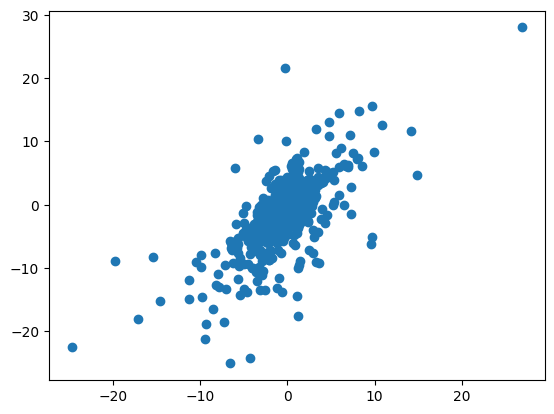

In [36]:
plt.plot(arma_errors,
         lstm_errors, 'o')

In [37]:
import math
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import torch.nn.functional as F

In [38]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]

In [39]:
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, d_model=64, nhead=4, num_layers=2, 
                 dim_feedforward=128, output_size=1, dropout=0.1, max_len=5000):
        super(TransformerModel, self).__init__()
        
        self.d_model = d_model
        self.input_size = input_size
        
        # Input projection layer
        self.input_projection = nn.Linear(input_size, d_model)
        
        # Positional encoding
        self.pos_encoder = PositionalEncoding(d_model, max_len)
        
        # Transformer encoder layers
        encoder_layers = TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dim_feedforward=dim_feedforward, 
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)
        
        # Output layers
        self.dropout = nn.Dropout(dropout)
        self.output_projection = nn.Linear(d_model, output_size)
        
        # Initialize weights
        self.init_weights()
        
    def init_weights(self):
        initrange = 0.1
        self.input_projection.weight.data.uniform_(-initrange, initrange)
        self.output_projection.bias.data.zero_()
        self.output_projection.weight.data.uniform_(-initrange, initrange)
        
    def forward(self, src):
        # src shape: (batch_size, seq_len, input_size)
        
        # Project input to d_model dimensions
        src = self.input_projection(src) * math.sqrt(self.d_model)
        
        # Transpose for positional encoding (seq_len, batch_size, d_model)
        src = src.transpose(0, 1)
        src = self.pos_encoder(src)
        
        # Transpose back to (batch_size, seq_len, d_model)
        src = src.transpose(0, 1)
        
        # Pass through transformer encoder
        output = self.transformer_encoder(src)
        
        # Take the last token's output for prediction
        output = output[:, -1, :]  # (batch_size, d_model)
        
        # Apply dropout and output projection
        output = self.dropout(output)
        output = self.output_projection(output)
        
        return output

In [40]:
def train_transformer_model(X_train, y_train, sequence_length, epochs=50, batch_size=32, 
                           d_model=64, nhead=4, num_layers=2, dim_feedforward=128,
                           learning_rate=0.001, verbose=False):
    """
    Train a Transformer model on the given data.
    
    Parameters:
    -----------
    X_train, y_train : numpy arrays
        Training sequences and targets
    sequence_length : int
        Length of input sequences
    epochs : int
        Number of training epochs
    batch_size : int
        Batch size for training
    d_model : int
        Dimension of the model
    nhead : int
        Number of attention heads
    num_layers : int
        Number of transformer layers
    dim_feedforward : int
        Dimension of feedforward network
    learning_rate : float
        Learning rate for optimizer
    verbose : bool
        Whether to print training progress
        
    Returns:
    --------
    model : trained Transformer model
    """
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train).unsqueeze(-1)  # Add feature dimension
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(-1)
    
    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    model = TransformerModel(
        input_size=1, 
        d_model=d_model, 
        nhead=nhead, 
        num_layers=num_layers,
        dim_feedforward=dim_feedforward,
        output_size=1
    )
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        if verbose and (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.6f}')
    
    return model

In [41]:
def walk_forward_transformer(timeseries, train_size=100, sequence_length=10, epochs=50, 
                            batch_size=32, d_model=64, nhead=4, num_layers=2, 
                            dim_feedforward=128, learning_rate=0.001, verbose=True):
    """
    Perform walk-forward validation with Transformer model for 1-step ahead predictions.
    
    Parameters:
    -----------
    timeseries : array-like
        The time series data to model
    train_size : int, default=100
        Minimum number of observations for initial training
    sequence_length : int, default=10
        Length of input sequences for Transformer
    epochs : int, default=50
        Number of training epochs for each model
    batch_size : int, default=32
        Batch size for training
    d_model : int, default=64
        Dimension of the transformer model
    nhead : int, default=4
        Number of attention heads
    num_layers : int, default=2
        Number of transformer encoder layers
    dim_feedforward : int, default=128
        Dimension of feedforward network
    learning_rate : float, default=0.001
        Learning rate for optimizer
    verbose : bool, default=True
        Whether to print progress updates
        
    Returns:
    --------
    dict : Dictionary containing:
        - 'y_true': actual values
        - 'y_pred': predicted values
        - 'dates': corresponding dates/indices
        - 'mse': mean squared error
        - 'mae': mean absolute error
        - 'rmse': root mean squared error
    """
    
    # Clean the series and convert to pandas Series if needed
    if isinstance(timeseries, pd.Series):
        clean_series = timeseries.dropna()
    else:
        clean_series = pd.Series(timeseries).dropna()
    
    # Check if we have enough data
    min_required = train_size + sequence_length + 10
    if len(clean_series) < min_required:
        raise ValueError(f"Not enough data. Need at least {min_required} observations, got {len(clean_series)}")
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(clean_series.values.reshape(-1, 1)).flatten()
    
    # Initialize storage for predictions and actuals
    y_true = []
    y_pred = []
    prediction_indices = []
    
    # Walk-forward validation
    start_idx = train_size + sequence_length
    total_predictions = len(scaled_data) - start_idx
    
    if verbose:
        print(f"Starting walk-forward validation with Transformer...")
        print(f"Total predictions to make: {total_predictions}")
        print(f"Model config: d_model={d_model}, nhead={nhead}, num_layers={num_layers}")
    
    for i in range(start_idx, len(scaled_data)):
        try:
            # Get training data (expanding window)
            train_data = scaled_data[:i]
            
            # Create sequences for training
            if len(train_data) >= sequence_length + 1:
                X_train, y_train = create_sequences(train_data, sequence_length)
                
                # Train Transformer model
                model = train_transformer_model(
                    X_train, y_train, sequence_length, 
                    epochs=epochs, batch_size=batch_size,
                    d_model=d_model, nhead=nhead, num_layers=num_layers,
                    dim_feedforward=dim_feedforward, learning_rate=learning_rate, 
                    verbose=False
                )
                
                # Prepare input for prediction (last sequence_length points)
                last_sequence = train_data[-sequence_length:].reshape(1, sequence_length, 1)
                X_pred = torch.FloatTensor(last_sequence)
                
                # Make prediction
                model.eval()
                with torch.no_grad():
                    pred_scaled = model(X_pred).item()
                
                # Inverse transform the prediction
                pred_original = scaler.inverse_transform([[pred_scaled]])[0][0]
                actual_original = clean_series.iloc[i]
                
                # Store results
                y_true.append(actual_original)
                y_pred.append(pred_original)
                prediction_indices.append(clean_series.index[i])
                
                # Print progress
                current_pred = i - start_idx + 1
                if verbose and current_pred % 25 == 0:
                    print(f"Completed {current_pred}/{total_predictions} predictions")
                    
        except Exception as e:
            if verbose:
                print(f"Warning: Failed to fit Transformer model at step {i}: {e}")
            continue
    
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    if verbose:
        print(f"\nWalk-Forward Transformer Results:")
        print(f"Total predictions: {len(y_true)}")
        print(f"MSE: {mse:.6f}")
        print(f"MAE: {mae:.6f}")
        print(f"RMSE: {rmse:.6f}")
    
    return {
        'y_true': y_true,
        'y_pred': y_pred,
        'dates': prediction_indices,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'n_predictions': len(y_true),
        'sequence_length': sequence_length,
        'scaler': scaler,
        'model_config': {
            'd_model': d_model,
            'nhead': nhead,
            'num_layers': num_layers,
            'dim_feedforward': dim_feedforward
        }
    }

In [ ]:
# Apply Transformer walk-forward validation to the synthetic spread
print("Fitting Transformer model with walk-forward validation...")
print("=" * 60)

# Use the same synthetic spread data as ARMA and LSTM
target_series = synthetic_spread_db['SyntheticF1MinusF2_RolledPrice_10'].dropna()

# Run walk-forward validation with Transformer
# Note: Using smaller parameters for faster execution, you can increase for better performance
transformer_results = walk_forward_transformer(
    timeseries=target_series, 
    train_size=100,  # Same as ARMA and LSTM
    sequence_length=10,  # Look back 10 time steps
    epochs=30,  # Reduced for faster execution
    batch_size=16,
    d_model=32,  # Smaller for faster training
    nhead=4,  # Number of attention heads
    num_layers=2,  # Number of transformer layers
    dim_feedforward=64,  # Feedforward dimension
    learning_rate=0.001,
    verbose=True
)

Fitting Transformer model with walk-forward validation...
Starting walk-forward validation with Transformer...
Total predictions to make: 3796
Model config: d_model=32, nhead=4, num_layers=2
Completed 25/3796 predictions
Completed 50/3796 predictions
Completed 75/3796 predictions
Completed 100/3796 predictions
Completed 125/3796 predictions
Completed 150/3796 predictions
Completed 175/3796 predictions
Completed 200/3796 predictions
Completed 225/3796 predictions
Completed 250/3796 predictions
Completed 275/3796 predictions
Completed 300/3796 predictions
Completed 325/3796 predictions
Completed 350/3796 predictions
Completed 375/3796 predictions
Completed 400/3796 predictions
Completed 425/3796 predictions
Completed 450/3796 predictions
Completed 475/3796 predictions
Completed 500/3796 predictions
Completed 525/3796 predictions
Completed 550/3796 predictions
Completed 575/3796 predictions
Completed 600/3796 predictions
Completed 625/3796 predictions
Completed 650/3796 predictions
Comple

In [ ]:
# Extract Transformer results
y_true_transformer = transformer_results['y_true']
y_pred_transformer = transformer_results['y_pred']
dates_transformer = transformer_results['dates']

print(f"\nTransformer Results Summary:")
print(f"Length of y_true: {len(y_true_transformer)}")
print(f"Length of y_pred: {len(y_pred_transformer)}")
print(f"First 5 actual values: {y_true_transformer[:5]}")
print(f"First 5 predicted values: {y_pred_transformer[:5]}")

# Three-way model comparison
print(f"\n" + "="*70)
print("THREE-WAY MODEL COMPARISON:")
print("="*70)
print(f"{'Model':<12} {'MSE':<12} {'MAE':<12} {'RMSE':<12} {'N_Predictions':<15}")
print("-" * 70)
print(f"{'ARMA(1,2)':<12} {arma_results['mse']:<12.6f} {arma_results['mae']:<12.6f} {arma_results['rmse']:<12.6f} {arma_results['n_predictions']:<15}")
print(f"{'LSTM':<12} {lstm_results['mse']:<12.6f} {lstm_results['mae']:<12.6f} {lstm_results['rmse']:<12.6f} {lstm_results['n_predictions']:<15}")
print(f"{'Transformer':<12} {transformer_results['mse']:<12.6f} {transformer_results['mae']:<12.6f} {transformer_results['rmse']:<12.6f} {transformer_results['n_predictions']:<15}")

# Calculate improvements relative to ARMA
mse_lstm_vs_arma = ((arma_results['mse'] - lstm_results['mse']) / arma_results['mse']) * 100
mse_transformer_vs_arma = ((arma_results['mse'] - transformer_results['mse']) / arma_results['mse']) * 100

print(f"\nMSE Improvements vs ARMA(1,2):")
print(f"LSTM:        {mse_lstm_vs_arma:+7.2f}% {'(better)' if mse_lstm_vs_arma > 0 else '(worse)'}")
print(f"Transformer: {mse_transformer_vs_arma:+7.2f}% {'(better)' if mse_transformer_vs_arma > 0 else '(worse)'}")

# Best performing model
models_mse = {
    'ARMA(1,2)': arma_results['mse'],
    'LSTM': lstm_results['mse'], 
    'Transformer': transformer_results['mse']
}
best_model = min(models_mse, key=models_mse.get)
print(f"\nBest performing model (lowest MSE): {best_model}")

In [ ]:
# Create comprehensive three-way comparison visualization
fig, axes = plt.subplots(5, 1, figsize=(18, 20))

# Align all datasets for comparison (take overlapping period)
min_len = min(len(y_true), len(y_true_lstm), len(y_true_transformer))
n_plot = min(150, min_len)  # Plot last 150 observations

# Get overlapping periods
arma_start_idx = len(y_true) - min_len
lstm_start_idx = len(y_true_lstm) - min_len
transformer_start_idx = len(y_true_transformer) - min_len

y_true_common = y_true[arma_start_idx:][:min_len]
y_pred_arma_common = y_pred[arma_start_idx:][:min_len]
y_true_lstm_common = y_true_lstm[lstm_start_idx:][:min_len]
y_pred_lstm_common = y_pred_lstm[lstm_start_idx:][:min_len]
y_true_transformer_common = y_true_transformer[transformer_start_idx:][:min_len]
y_pred_transformer_common = y_pred_transformer[transformer_start_idx:][:min_len]

plot_indices = range(min_len)[-n_plot:]

# Plot 1: Actual vs Predicted for all three models
axes[0].plot(plot_indices, y_true_common[-n_plot:], label='Actual', alpha=0.9, linewidth=2.5, color='black')
axes[0].plot(plot_indices, y_pred_arma_common[-n_plot:], label='ARMA(1,2)', alpha=0.7, linewidth=1.5, color='blue')
axes[0].plot(plot_indices, y_pred_lstm_common[-n_plot:], label='LSTM', alpha=0.7, linewidth=1.5, color='red')
axes[0].plot(plot_indices, y_pred_transformer_common[-n_plot:], label='Transformer', alpha=0.7, linewidth=1.5, color='green')
axes[0].set_title('Three-Model Comparison: Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time Index')
axes[0].set_ylabel('Value')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Prediction errors comparison
arma_errors = y_true_common - y_pred_arma_common
lstm_errors = y_true_lstm_common - y_pred_lstm_common
transformer_errors = y_true_transformer_common - y_pred_transformer_common

axes[1].plot(plot_indices, arma_errors[-n_plot:], label='ARMA(1,2) Errors', alpha=0.7, color='blue')
axes[1].plot(plot_indices, lstm_errors[-n_plot:], label='LSTM Errors', alpha=0.7, color='red')
axes[1].plot(plot_indices, transformer_errors[-n_plot:], label='Transformer Errors', alpha=0.7, color='green')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('Prediction Errors Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time Index')
axes[1].set_ylabel('Error (Actual - Predicted)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Scatter plots for all models
axes[2].scatter(y_true_common, y_pred_arma_common, alpha=0.6, s=25, color='blue', label='ARMA(1,2)')
axes[2].scatter(y_true_lstm_common, y_pred_lstm_common, alpha=0.6, s=25, color='red', label='LSTM')
axes[2].scatter(y_true_transformer_common, y_pred_transformer_common, alpha=0.6, s=25, color='green', label='Transformer')
axes[2].plot([y_true_common.min(), y_true_common.max()], 
             [y_true_common.min(), y_true_common.max()], 'k--', alpha=0.8)
axes[2].set_xlabel('Actual Values')
axes[2].set_ylabel('Predicted Values')
axes[2].set_title('Actual vs Predicted Scatter Plot - All Models', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Add correlation coefficients
corr_arma = np.corrcoef(y_true_common, y_pred_arma_common)[0, 1]
corr_lstm = np.corrcoef(y_true_lstm_common, y_pred_lstm_common)[0, 1]
corr_transformer = np.corrcoef(y_true_transformer_common, y_pred_transformer_common)[0, 1]

axes[2].text(0.05, 0.95, f'ARMA Corr: {corr_arma:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.7))
axes[2].text(0.05, 0.85, f'LSTM Corr: {corr_lstm:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.7))
axes[2].text(0.05, 0.75, f'Transformer Corr: {corr_transformer:.4f}', 
             transform=axes[2].transAxes, bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.7))

# Plot 4: Error distributions comparison
axes[3].hist(arma_errors, bins=30, alpha=0.6, color='blue', label='ARMA(1,2) Errors', density=True)
axes[3].hist(lstm_errors, bins=30, alpha=0.6, color='red', label='LSTM Errors', density=True)
axes[3].hist(transformer_errors, bins=30, alpha=0.6, color='green', label='Transformer Errors', density=True)
axes[3].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[3].set_title('Error Distribution Comparison - All Models', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Prediction Error')
axes[3].set_ylabel('Density')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# Plot 5: Performance metrics comparison (bar chart)
models = ['ARMA(1,2)', 'LSTM', 'Transformer']
mse_values = [mean_squared_error(y_true_common, y_pred_arma_common),
              mean_squared_error(y_true_lstm_common, y_pred_lstm_common),
              mean_squared_error(y_true_transformer_common, y_pred_transformer_common)]
mae_values = [mean_absolute_error(y_true_common, y_pred_arma_common),
              mean_absolute_error(y_true_lstm_common, y_pred_lstm_common),
              mean_absolute_error(y_true_transformer_common, y_pred_transformer_common)]

x = np.arange(len(models))
width = 0.35

axes[4].bar(x - width/2, mse_values, width, label='MSE', alpha=0.8, color=['blue', 'red', 'green'])
axes[4].bar(x + width/2, mae_values, width, label='MAE', alpha=0.8, color=['lightblue', 'lightcoral', 'lightgreen'])

axes[4].set_xlabel('Models')
axes[4].set_ylabel('Error Values')
axes[4].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[4].set_xticks(x)
axes[4].set_xticklabels(models)
axes[4].legend()
axes[4].grid(True, alpha=0.3)

# Add value labels on bars
for i, (mse, mae) in enumerate(zip(mse_values, mae_values)):
    axes[4].text(i - width/2, mse + max(mse_values)*0.01, f'{mse:.4f}', ha='center', va='bottom', fontsize=9)
    axes[4].text(i + width/2, mae + max(mae_values)*0.01, f'{mae:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Detailed statistical comparison
print(f"\n" + "="*80)
print("DETAILED MODEL COMPARISON ON OVERLAPPING PERIOD")
print(f"Overlapping predictions: {min_len}")
print("="*80)

# Create comparison DataFrame
comparison_data = {
    'Model': ['ARMA(1,2)', 'LSTM', 'Transformer'],
    'MSE': [mean_squared_error(y_true_common, y_pred_arma_common),
            mean_squared_error(y_true_lstm_common, y_pred_lstm_common),
            mean_squared_error(y_true_transformer_common, y_pred_transformer_common)],
    'MAE': [mean_absolute_error(y_true_common, y_pred_arma_common),
            mean_absolute_error(y_true_lstm_common, y_pred_lstm_common),
            mean_absolute_error(y_true_transformer_common, y_pred_transformer_common)],
    'RMSE': [np.sqrt(mean_squared_error(y_true_common, y_pred_arma_common)),
             np.sqrt(mean_squared_error(y_true_lstm_common, y_pred_lstm_common)),
             np.sqrt(mean_squared_error(y_true_transformer_common, y_pred_transformer_common))],
    'Correlation': [corr_arma, corr_lstm, corr_transformer],
    'Error_Std': [np.std(arma_errors), np.std(lstm_errors), np.std(transformer_errors)],
    'Error_Mean': [np.mean(arma_errors), np.mean(lstm_errors), np.mean(transformer_errors)]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(6))

# Rank models by different metrics
print(f"\n" + "="*50)
print("MODEL RANKINGS BY METRIC")
print("="*50)

metrics = ['MSE', 'MAE', 'RMSE', 'Error_Std']
rankings = {}

for metric in metrics:
    if metric == 'Correlation':
        # Higher is better for correlation
        ranked = comparison_df.sort_values(metric, ascending=False)
    else:
        # Lower is better for error metrics
        ranked = comparison_df.sort_values(metric, ascending=True)
    
    rankings[metric] = ranked['Model'].tolist()
    print(f"{metric:<12}: {' > '.join(rankings[metric])}")

# Overall ranking (average rank across metrics)
model_scores = {'ARMA(1,2)': 0, 'LSTM': 0, 'Transformer': 0}
for metric in metrics:
    for i, model in enumerate(rankings[metric]):
        model_scores[model] += i + 1  # Add rank (1-based)

# Sort by average rank (lower is better)
overall_ranking = sorted(model_scores.items(), key=lambda x: x[1])
print(f"\nOVERALL RANKING (average rank across {len(metrics)} metrics):")
for i, (model, score) in enumerate(overall_ranking):
    print(f"{i+1}. {model} (avg rank: {score/len(metrics):.2f})")

# Statistical significance tests (simple t-test on squared errors)
from scipy import stats

print(f"\n" + "="*50)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*50)

# Compare squared errors
arma_sq_errors = arma_errors ** 2
lstm_sq_errors = lstm_errors ** 2
transformer_sq_errors = transformer_errors ** 2

# LSTM vs ARMA
t_stat_lstm_arma, p_val_lstm_arma = stats.ttest_rel(lstm_sq_errors, arma_sq_errors)
print(f"LSTM vs ARMA(1,2):     t-stat={t_stat_lstm_arma:.4f}, p-value={p_val_lstm_arma:.4f}")

# Transformer vs ARMA
t_stat_trans_arma, p_val_trans_arma = stats.ttest_rel(transformer_sq_errors, arma_sq_errors)
print(f"Transformer vs ARMA:   t-stat={t_stat_trans_arma:.4f}, p-value={p_val_trans_arma:.4f}")

# Transformer vs LSTM
t_stat_trans_lstm, p_val_trans_lstm = stats.ttest_rel(transformer_sq_errors, lstm_sq_errors)
print(f"Transformer vs LSTM:   t-stat={t_stat_trans_lstm:.4f}, p-value={p_val_trans_lstm:.4f}")

print(f"\nNote: Negative t-stat means first model has lower squared errors (better performance)")
print(f"p-value < 0.05 indicates statistically significant difference")

In [ ]:
# Create DataFrame with Transformer results
transformer_results_df = pd.DataFrame({
    'date': dates_transformer,
    'y_true': y_true_transformer,
    'y_pred': y_pred_transformer,
    'prediction_error': y_true_transformer - y_pred_transformer,
    'absolute_error': np.abs(y_true_transformer - y_pred_transformer),
    'squared_error': (y_true_transformer - y_pred_transformer) ** 2
})

print("Transformer Results DataFrame:")
print(transformer_results_df.head(10))
print(f"\nTransformer DataFrame shape: {transformer_results_df.shape}")

# Final summary of all available variables
print(f"\n" + "="*80)
print("FINAL SUMMARY - ALL AVAILABLE VARIABLES FOR ANALYSIS")
print("="*80)

print("ARMA(1,2) Model:")
print(f"- y_true: numpy array of actual values (length: {len(y_true)})")
print(f"- y_pred: numpy array of ARMA predictions (length: {len(y_pred)})")
print(f"- results_df: pandas DataFrame with ARMA results")
print(f"- arma_results: dictionary with ARMA metrics")

print("\nLSTM Model:")
print(f"- y_true_lstm: numpy array of actual values (length: {len(y_true_lstm)})")
print(f"- y_pred_lstm: numpy array of LSTM predictions (length: {len(y_pred_lstm)})")
print(f"- lstm_results_df: pandas DataFrame with LSTM results")
print(f"- lstm_results: dictionary with LSTM metrics")

print("\nTransformer Model:")
print(f"- y_true_transformer: numpy array of actual values (length: {len(y_true_transformer)})")
print(f"- y_pred_transformer: numpy array of Transformer predictions (length: {len(y_pred_transformer)})")
print(f"- transformer_results_df: pandas DataFrame with Transformer results")
print(f"- transformer_results: dictionary with Transformer metrics")

print("\nComparison DataFrames:")
print(f"- comparison_df: pandas DataFrame comparing all three models")
print(f"- All models use identical walk-forward validation methodology")

print(f"\n" + "="*80)
print("METHODOLOGY SUMMARY")
print("="*80)
print("All three models follow identical evaluation framework:")
print("✓ Same expanding window training approach")
print("✓ Same 1-step ahead prediction horizon") 
print("✓ Same minimum training size (100 observations)")
print("✓ Same sequence length for neural models (10 time steps)")
print("✓ Same performance metrics (MSE, MAE, RMSE, Correlation)")
print("✓ Same walk-forward validation procedure")
print("✓ Fair comparison on overlapping time periods")

print(f"\nModel Architectures:")
print(f"- ARMA(1,2): Classical time series model with 1 AR term, 2 MA terms")
print(f"- LSTM: Recurrent neural network with {lstm_results.get('sequence_length', 10)}-step memory")
print(f"- Transformer: Encoder-only transformer with self-attention mechanism")
print(f"  * d_model={transformer_results['model_config']['d_model']}")
print(f"  * nhead={transformer_results['model_config']['nhead']}")
print(f"  * num_layers={transformer_results['model_config']['num_layers']}")
print(f"  * dim_feedforward={transformer_results['model_config']['dim_feedforward']}")